In [486]:

from retrieval_base.retrieval import pre_processing, Retrieval
from retrieval_base.parameters import Parameters
import config_freechem_quickstart as conf

import numpy as np
import matplotlib.pyplot as plt
import copy

import os

if 'dgonzalezpi' in os.getcwd():
    print('Running on Snellius.. disabling interactive plotting')
    import matplotlib
    # disable interactive plotting
    matplotlib.use('Agg')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [487]:
%pwd

'/home/dario/phd/retrieval_base/J0856'

In [488]:
s = 'C18O'
ret = Retrieval(conf=conf, evaluation=False)
ret.Param(0.7 * np.ones(len(ret.Param.param_keys)))


ret_no_s = Retrieval(conf=conf, evaluation=False)
ret_no_s.Param(0.7 * np.ones(len(ret_no_s.Param.param_keys)))
# ret_no_s.Param.params[f'log_{s}'] = 1e-14
# Ignore one species at a time
ret_no_s.Chem.neglect_species = dict.fromkeys(ret_no_s.Chem.neglect_species, False)
ret_no_s.Chem.neglect_species[s] = True
ret_no_s.PMN_lnL_func()


882820.2675563088

In [489]:
n_orders = ret.d_spec['K2166'].flux.shape[0]
orders = np.arange(n_orders)

In [490]:

ret.Chem.__dict__
ret.Param.VMR_species

{'12CO': 1e-05,
 '13CO': 1e-05,
 'C18O': 1e-05,
 'H2O': 1e-05,
 'CN': 1e-05,
 'HF': 1e-05,
 'K': 1e-05,
 'Na': 1e-05,
 'Ti': 1e-05,
 'Fe': 1e-05,
 'Ca': 1e-05,
 'Mg': 1e-05,
 'Si': 1e-05,
 'CaII': 1e-05,
 'FeII': 1e-05}

{'log_a': 0.04999999999999982, 'log_l': -1.1600000000000001, 'R_p': 3.65, 'log_g': 3.7, 'vsini': 5.4, 'rv': 8.799999999999997, 'log_12CO': -5.0, 'log_13CO': -5.0, 'log_C18O': -7.0, 'log_H2O': -5.0, 'log_Na': -5.0, 'log_Mg': -5.0, 'log_K': -5.0, 'log_Ca': -5.0, 'log_Ti': -5.0, 'log_Fe': -5.0, 'log_CaII': -5.0, 'log_FeII': -5.0, 'log_Si': -5.0, 'log_CN': -5.0, 'log_HF': -5.0, 'dlnT_dlnP_0': 0.31000000000000005, 'dlnT_dlnP_1': 0.178, 'dlnT_dlnP_2': 0.22499999999999998, 'dlnT_dlnP_3': 0.13999999999999999, 'dlnT_dlnP_4': 0.08999999999999998, 'T_0': 7600.0}


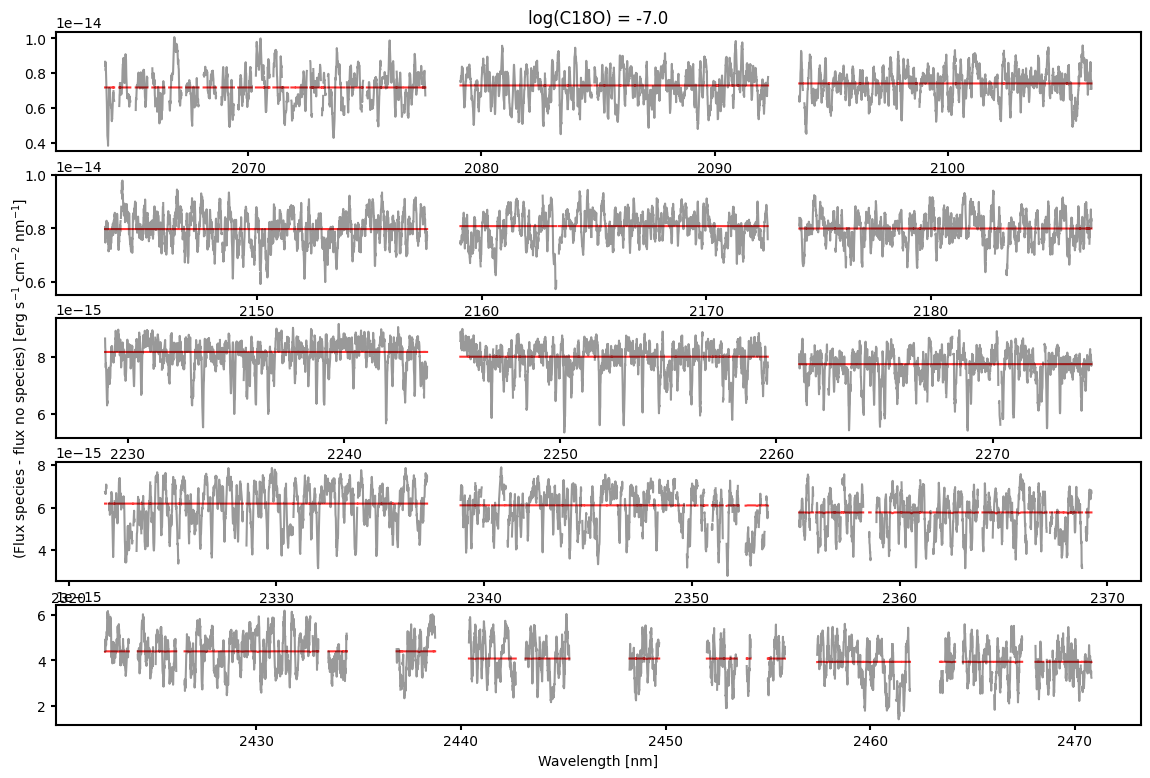

In [495]:


def plot_order(ret, ret_no_s, ax, n_orders=5, log_s=1e-3):
    
    sample = {k:ret.Param.params[k] for k in ret.Param.param_keys}
    sample[f'log_{s}'] = log_s
    print(sample)

    # ret.Param.params[f'log_{s}'] = log_s
    ret.Param.VMR_species[s] = 10**log_s
    
    ln_L = ret.PMN_lnL_func()
    
    
    for order in range(n_orders):
        for det in range(3):

        
        
            x = ret.d_spec['K2166'].wave[order,det]
            
            f = ret.LogLike['K2166'].f[order,det]
            mask = ret.d_spec['K2166'].mask_isfinite[order,det]
            # if (order+det) == 0:
            
            median = np.nanmedian(ret.d_spec['K2166'].flux[order,det])
                
            # model = f * ret.m_spec['K2166'].flux[order,det]
            model = ret.m_spec['K2166'].flux[order,det]
            model_no_s = ret_no_s.m_spec['K2166'].flux[order,det]
            
            res = (f * model) - (ret_no_s.LogLike['K2166'].f[order,det] * model_no_s)
            res[~mask] = np.nan
            ax[order].plot(x, median + res, lw=1.5, label=f'logL = {ln_L:.3e}', ls='-', color='r', alpha=0.8)
            # ax[order].plot(x, model, lw=2.5, label=f'logL = {ln_L:.3e}', ls='-')
            # ax[order].plot(x, model_no_Ca, lw=2.5, label=f'logL = {ln_L:.3e}', ls='-')
            ax[order].plot(x, ret.d_spec['K2166'].flux[order,det], lw=1.5, label='data', color='k', alpha=0.4)

    return ax

fig, ax = plt.subplots(len(orders), 1, figsize=(14, 1.8 * len(orders)))
  
log_vmr = -7.
ax = plot_order(ret, ret_no_s, ax, n_orders=5, log_s=log_vmr)
ylims = [axi.get_ylim() for axi in ax]
ylim = (np.min(ylims), np.max(ylims))
# [axi.set_ylim(ylim) for axi in ax]
ax[0].set(title=f'log({s}) = {log_vmr:.1f}')
ax[-1].set(xlabel='Wavelength [nm]')
ax[len(ax)//2].set(ylabel='(Flux species - flux no species) [erg s$^{-1}$ cm$^{-2}$ nm$^{-1}$]')
plt.show()
fig.savefig(f'species_model/{s}_log{log_vmr:.1f}.png', dpi=300, bbox_inches='tight')

In [492]:


ylim

(1.1799939808473149e-15, 1.0383647210589076e-14)